In [1]:
import tensorflow as tf
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
data_x = []
data_y = []

In [6]:
filenames = []
for file in os.listdir('audio'):
    filenames.append(file)
filenames

['03-01-03-01-01-01-01.wav',
 '03-01-03-01-01-01-02.wav',
 '03-01-03-01-01-01-03.wav',
 '03-01-03-01-01-01-04.wav',
 '03-01-03-01-01-02-01.wav',
 '03-01-03-01-01-02-02.wav',
 '03-01-03-01-01-02-03.wav',
 '03-01-03-01-01-02-04.wav',
 '03-01-03-01-02-01-01.wav',
 '03-01-03-01-02-01-02.wav',
 '03-01-03-01-02-01-03.wav',
 '03-01-03-01-02-01-04.wav',
 '03-01-03-01-02-02-01.wav',
 '03-01-03-01-02-02-02.wav',
 '03-01-03-01-02-02-03.wav',
 '03-01-03-01-02-02-04.wav',
 '03-01-03-02-01-01-01.wav',
 '03-01-03-02-01-01-02.wav',
 '03-01-03-02-01-01-03.wav',
 '03-01-03-02-01-01-04.wav',
 '03-01-03-02-01-02-01.wav',
 '03-01-03-02-01-02-02.wav',
 '03-01-03-02-01-02-03.wav',
 '03-01-03-02-01-02-04.wav',
 '03-01-03-02-02-01-01.wav',
 '03-01-03-02-02-01-02.wav',
 '03-01-03-02-02-01-03.wav',
 '03-01-03-02-02-01-04.wav',
 '03-01-03-02-02-02-01.wav',
 '03-01-03-02-02-02-02.wav',
 '03-01-03-02-02-02-03.wav',
 '03-01-03-02-02-02-04.wav',
 '03-01-04-01-01-01-01.wav',
 '03-01-04-01-01-01-02.wav',
 '03-01-04-01-

In [9]:
for filename in filenames:
    data, sampling_rate = librosa.load("audio/" + filename)
    data_x.append(data[22000:26000])

In [22]:
for filename in filenames:
    if filename[7] == '3':
        data_y.append(1)
    elif filename[7] == '4':
        data_y.append(0)

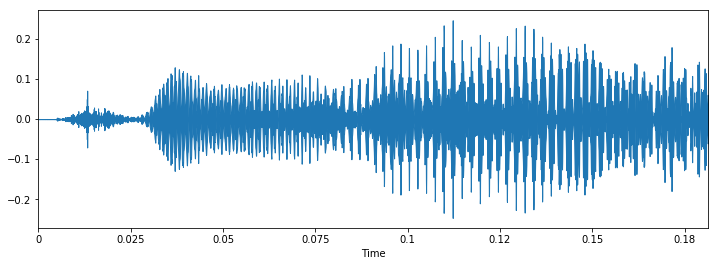

In [14]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data_x[63], sr=sampling_rate)

In [30]:
data_y_correct = []
for val in data_y:
    val_arr = []
    val_arr.append(val)
    data_y_correct.append(val_arr)

In [32]:
data_y_correct

[[1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0]]

In [33]:
features = 4000
eps = 1e-12

x = tf.placeholder(tf.float32, [None, features])

y_ = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.zeros([features,1]))

b = tf.Variable(tf.zeros([1]))

y = 1 / (1.0 + tf.exp(-(tf.matmul(x,W) + b)))

loss1 = -(y_ * tf.log(y + eps) + (1 - y_) * tf.log(1 - y + eps))

loss = tf.reduce_mean(loss1)

update = tf.train.GradientDescentOptimizer(0.00001).minimize(loss)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(0,10):
    sess.run(update, feed_dict = {x:data_x, y_:data_y_correct}) #BGD

In [34]:
def logistic_fun(z):
    return 1/(1.0 + np.exp(-z))

In [37]:
print("Prediction: " ,logistic_fun(np.matmul(data_x,sess.run(W)) + sess.run(b))[0][0])

Prediction:  0.5


In [176]:
data_new, sampling_rate = librosa.load('audio/03-01-01-01-01-01-02.wav')
data_test = [data_new[25000:26000]]


In [177]:
data_test

[array([ 2.80368961e-02,  2.16418058e-02,  1.44226523e-02,  1.20259672e-02,
         1.52753368e-02,  1.96363404e-02,  1.70418639e-02,  7.56221963e-03,
         4.54496621e-04, -2.38582888e-03, -2.61221640e-03, -8.89791292e-04,
         3.55463912e-04, -6.37468940e-04, -7.76542816e-03, -1.63558498e-02,
        -1.79259330e-02, -1.29288519e-02, -6.52538240e-03, -3.46489670e-03,
        -4.33292985e-03, -7.07304198e-03, -1.09205516e-02, -1.10239182e-02,
        -4.87751840e-03,  3.11174663e-03,  8.24587233e-03,  6.12053694e-03,
         8.00707203e-04, -1.90260098e-03,  3.93996779e-05,  6.02684729e-03,
         1.10090906e-02,  1.05530405e-02,  6.61874050e-03,  2.16611545e-03,
         1.66951760e-03,  4.03334200e-03,  3.88248730e-03,  1.97962462e-03,
        -2.23460793e-03, -5.80633339e-03, -9.13423300e-03, -1.34949768e-02,
        -1.97741501e-02, -2.50394586e-02, -3.02547216e-02, -3.27119268e-02,
        -2.51015685e-02, -1.01759611e-02,  1.23417913e-03, -1.12307016e-02,
        -3.7